<a href="https://colab.research.google.com/github/eroali/DeepLearning/blob/main/transfer_learning_trial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Retrying Transfer Learning**

In [ ]:
!wget https://www.dropbox.com/s/t4pzwpvrzneb190/training_set.zip
!wget https://www.dropbox.com/s/i37jfni3d29raoc/test_set.zip

In [ ]:
!unzip training_set.zip
!unzip test_set.zip

**train & validation path**

In [ ]:
img_width, img_height = 224,224  #width and height of the images
train_data_dir = r"/content/training_set/training_set"
validation_data_dir=r"/content/test_set/test_set"
nb_train_sample =100
nb_validation_samples =100
epochs =20
batch_size= 20

In [ ]:
import tensorflow.keras.backend as k
if k.image_data_format()=='channels_first': 
    input_shape=(3, img_width, img_height)
else:
    input_shape=(img_width,img_height,3)

# **transfer learning**

In [ ]:
import tensorflow 
from tensorflow import keras

from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg19 import VGG19
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg19 import preprocess_input
from keras.preprocessing import image
import matplotlib.image as mpimg
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential

import numpy as np
from glob import glob
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, Activation

from keras.layers import Input, Lambda
from keras.models import Model

from keras import layers
from keras import applications
from keras import optimizers


image_size = 224
input_shape = (image_size, image_size, 3)

epochs = 18
batch_size = 32

vgg16 = VGG16(input_shape=input_shape,
                          include_top=False,
                          weights="imagenet")


vgg19 = VGG19(input_shape=input_shape,
                          include_top=False,
                          weights="imagenet")

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten
from keras.layers import Dense, Activation, BatchNormalization
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
earlystop = EarlyStopping(patience=10)

learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)


callbacks = [earlystop, learning_rate_reduction]

# don't train existing weights
for layer in vgg16.layers:
  layer.trainable = False

# don't train existing weights
for layer in vgg19.layers:
  layer.trainable = False

x1 = Flatten()(vgg16.output)
x2 = Flatten()(vgg19.output)

# Add a fully connected layer with 512 hidden units and ReLU activation
x1 = Dense(512, activation='relu')(x1)
x1 = Dropout(0.5)(x1)


# Add a fully connected layer with 512 hidden units and ReLU activation
x2 = Dense(512, activation='relu')(x2)
x2 = Dropout(0.5)(x2)


# Add a final sigmoid layer for classification
x1 = layers.Dense(1, activation='sigmoid')(x1)

# Add a final sigmoid layer for classification
x2 = layers.Dense(1, activation='sigmoid')(x2)


model1 = Model(vgg16.input, x1)
model2 = Model(vgg19.input, x2)

#model.summary()

In [ ]:
train_datagen=ImageDataGenerator(rescale=1./255,
                                  shear_range =0.2,
                                  zoom_range=0.2,
                                  horizontal_flip =True)


test_datagen=ImageDataGenerator (rescale=1./255)


train_generator =train_datagen.flow_from_directory(train_data_dir,
                                                   target_size =(img_width,img_height),
                                                   batch_size=batch_size,
                                                   class_mode='binary',
                                                   classes=['cats','dogs'])

validation_generator =test_datagen.flow_from_directory(validation_data_dir,
                                                       target_size =(img_width,img_height),
                                                       batch_size=batch_size,
                                                       class_mode='binary')


Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


In [ ]:
model1.compile(loss='binary_crossentropy',
              optimizer= 'adam',
              metrics=['accuracy'])

model1.summary()

Model: "model_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0  

In [ ]:
model2.compile(loss='binary_crossentropy',
              optimizer= 'adam',
              metrics=['accuracy'])

model2.summary()

Model: "model_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0  

In [ ]:
training = model2.fit(train_generator,
                   steps_per_epoch=nb_train_sample,
                   epochs=epochs,
                   validation_data=validation_generator,
                   validation_steps=nb_validation_samples,
                   callbacks=callbacks)

Epoch 1/18
100/100 [==============================] - 50s 497ms/step - loss: 2.4063 - accuracy: 0.6635 - val_loss: 0.4770 - val_accuracy: 0.7696
Epoch 2/18
100/100 [==============================] - 41s 405ms/step - loss: 0.3706 - accuracy: 0.8235
Epoch 3/18
100/100 [==============================] - 41s 407ms/step - loss: 0.3259 - accuracy: 0.8575
Epoch 4/18
100/100 [==============================] - 40s 404ms/step - loss: 0.3192 - accuracy: 0.8515
Epoch 5/18
100/100 [==============================] - 41s 406ms/step - loss: 0.3344 - accuracy: 0.8514
Epoch 6/18
100/100 [==============================] - 41s 405ms/step - loss: 0.2817 - accuracy: 0.8812
Epoch 7/18
100/100 [==============================] - 41s 408ms/step - loss: 0.2833 - accuracy: 0.8814
Epoch 8/18
100/100 [==============================] - 41s 404ms/step - loss: 0.2887 - accuracy: 0.8802
Epoch 9/18
100/100 [==============================] - 41s 406ms/step - loss: 0.2525 - accuracy: 0.8966
Epoch 10/18
100/100 [==========

# **find accuracy score**

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


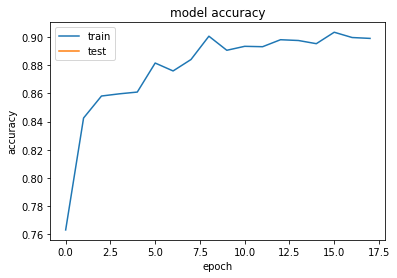

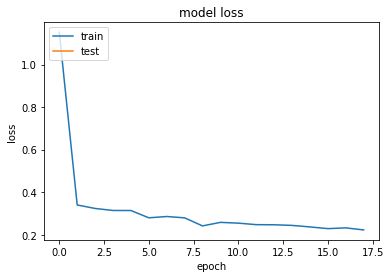

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

[[1.]]
Prediction:  Dog


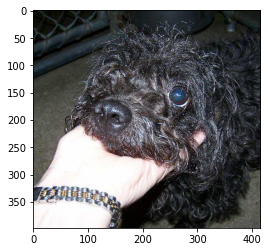

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
img_pred = image.load_img("/content/test_set/test_set/dogs/dog.4303.jpg",target_size=(224,224))

img_pred=image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred, axis=0)

result = model2.predict(img_pred)
print(result)
if result[0][0]==1:
    prediction ="Dog"
else:
    prediction ="Cat"
print('Prediction: ',prediction)

img=mpimg.imread('/content/test_set/test_set/dogs/dog.4303.jpg')
imgplot = plt.imshow(img)
plt.show()


[[0.]]
Prediction:  Cat


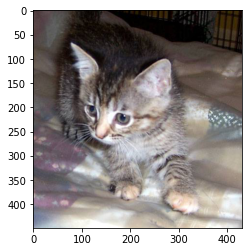

In [ ]:
img_pred = image.load_img("/content/test_set/test_set/cats/cat.4303.jpg",target_size=(224,224))

img_pred=image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred, axis=0)

rslt = model2.predict(img_pred)
print(rslt)
if rslt[0][0]==1:
    prediction ="Dog"
else:
    prediction ="Cat"
print('Prediction: ',prediction)

img=mpimg.imread('/content/test_set/test_set/cats/cat.4303.jpg')
imgplot = plt.imshow(img)
plt.show()